In [1]:
!pip install scikeras

In [2]:
import pandas as pd
import numpy as np
from sklearn.model_selection import StratifiedKFold, cross_val_score, train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF
from sklearn.metrics import accuracy_score, f1_score, roc_auc_score
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, SimpleRNN
from scikeras.wrappers import KerasClassifier
from tensorflow.keras.utils import set_random_seed
import warnings
warnings.filterwarnings("ignore")

In [3]:
df = pd.read_csv("heart_disease_uci.csv")

In [4]:
df = df.drop(columns=["id", "dataset"])
df["target"] = df["num"].apply(lambda x: 1 if x > 0 else 0)
df.drop(columns=["num"], inplace=True)


In [5]:
numerical_features = ['age', 'trestbps', 'chol', 'thalch', 'oldpeak', 'ca']
categorical_features = ['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'thal']

In [6]:
#Handle missing data
df[numerical_features] = SimpleImputer(strategy='median').fit_transform(df[numerical_features])
for col in categorical_features:
    df[col] = df[col].astype(str)
    df[col] = SimpleImputer(strategy='most_frequent').fit_transform(df[[col]]).ravel()
    df[col] = LabelEncoder().fit_transform(df[col])


In [7]:
df[numerical_features] = StandardScaler().fit_transform(df[numerical_features])

# Final dataset
X = df[numerical_features + categorical_features]
y = df['target']

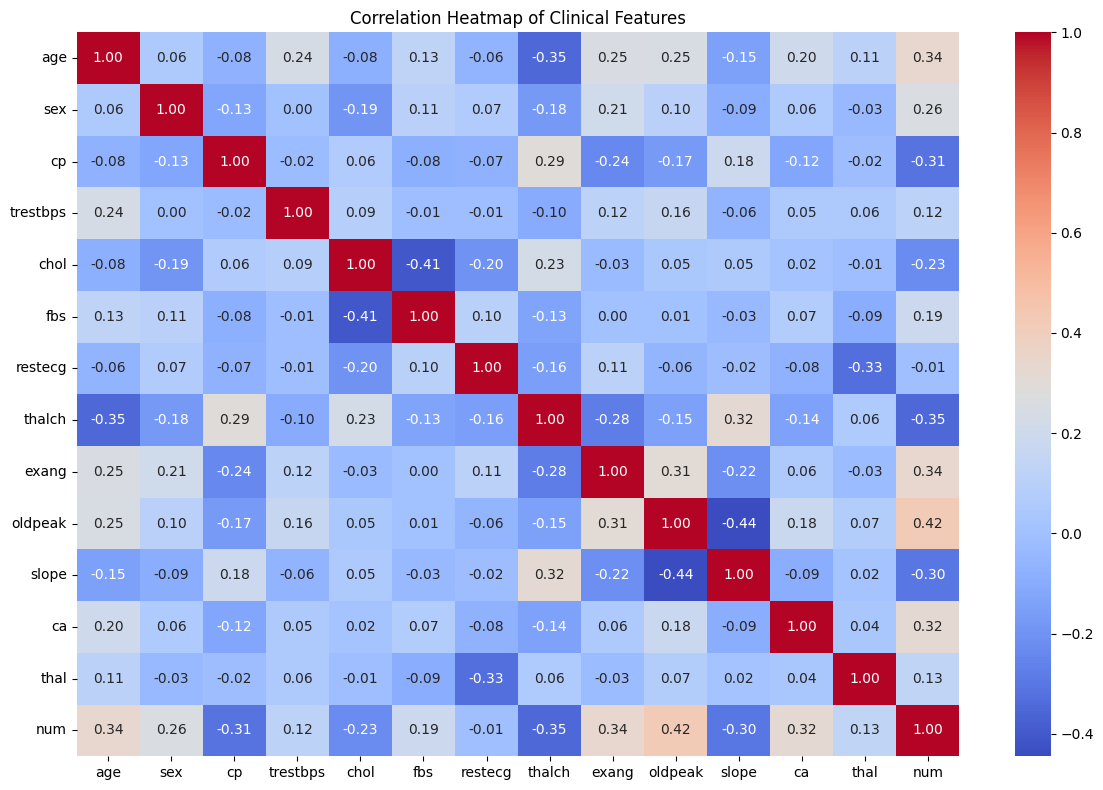


🔍 Conclusion (Heatmap):

- `ca` (number of vessels) and `oldpeak` (ST depression) are the most positively correlated with disease severity (`num`).
- `thalch` (max heart rate) and `cp` (chest pain type) are inversely correlated with severity.
- Features like `sex`, `fbs`, and `restecg` show low or near-zero correlation with severity.



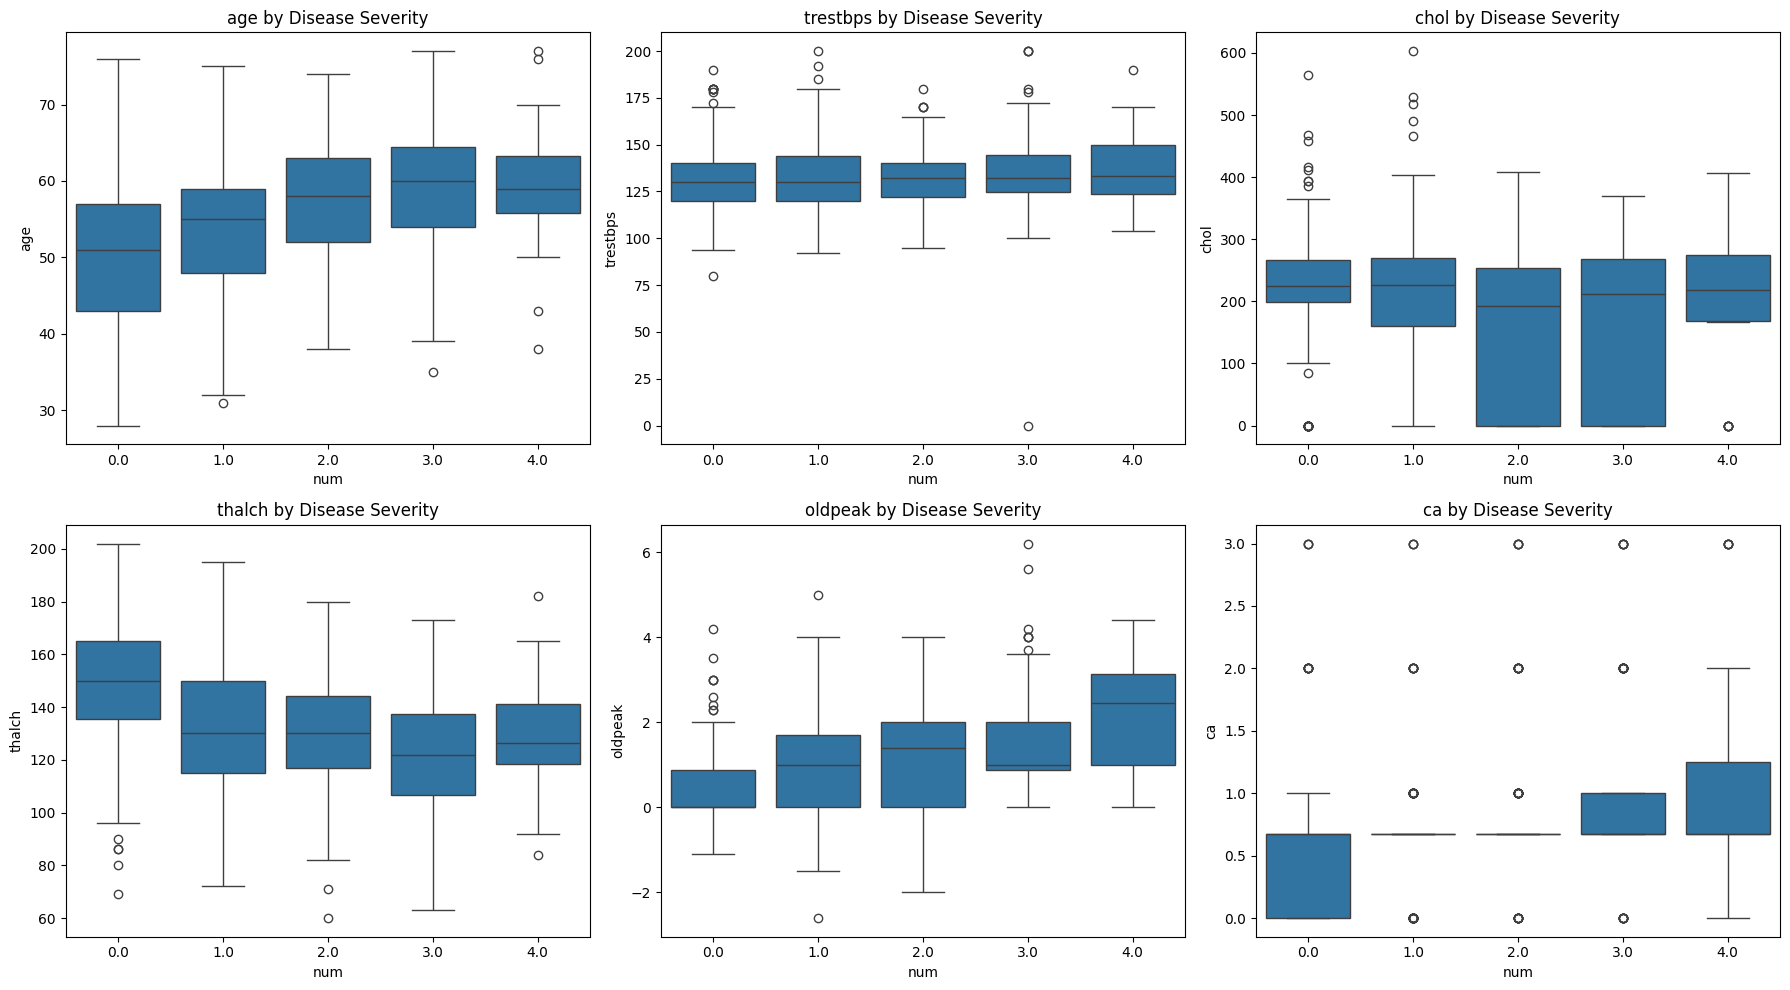


📊 Conclusion (Boxplots):

- `thalch`: Lower max heart rate is seen in patients with higher severity.
- `oldpeak`: Higher values are associated with greater severity.
- `ca`: Clear upward trend — more vessels involved → more severe condition.
- `chol` and `trestbps`: Show weak trends, not strongly separable across severity classes.



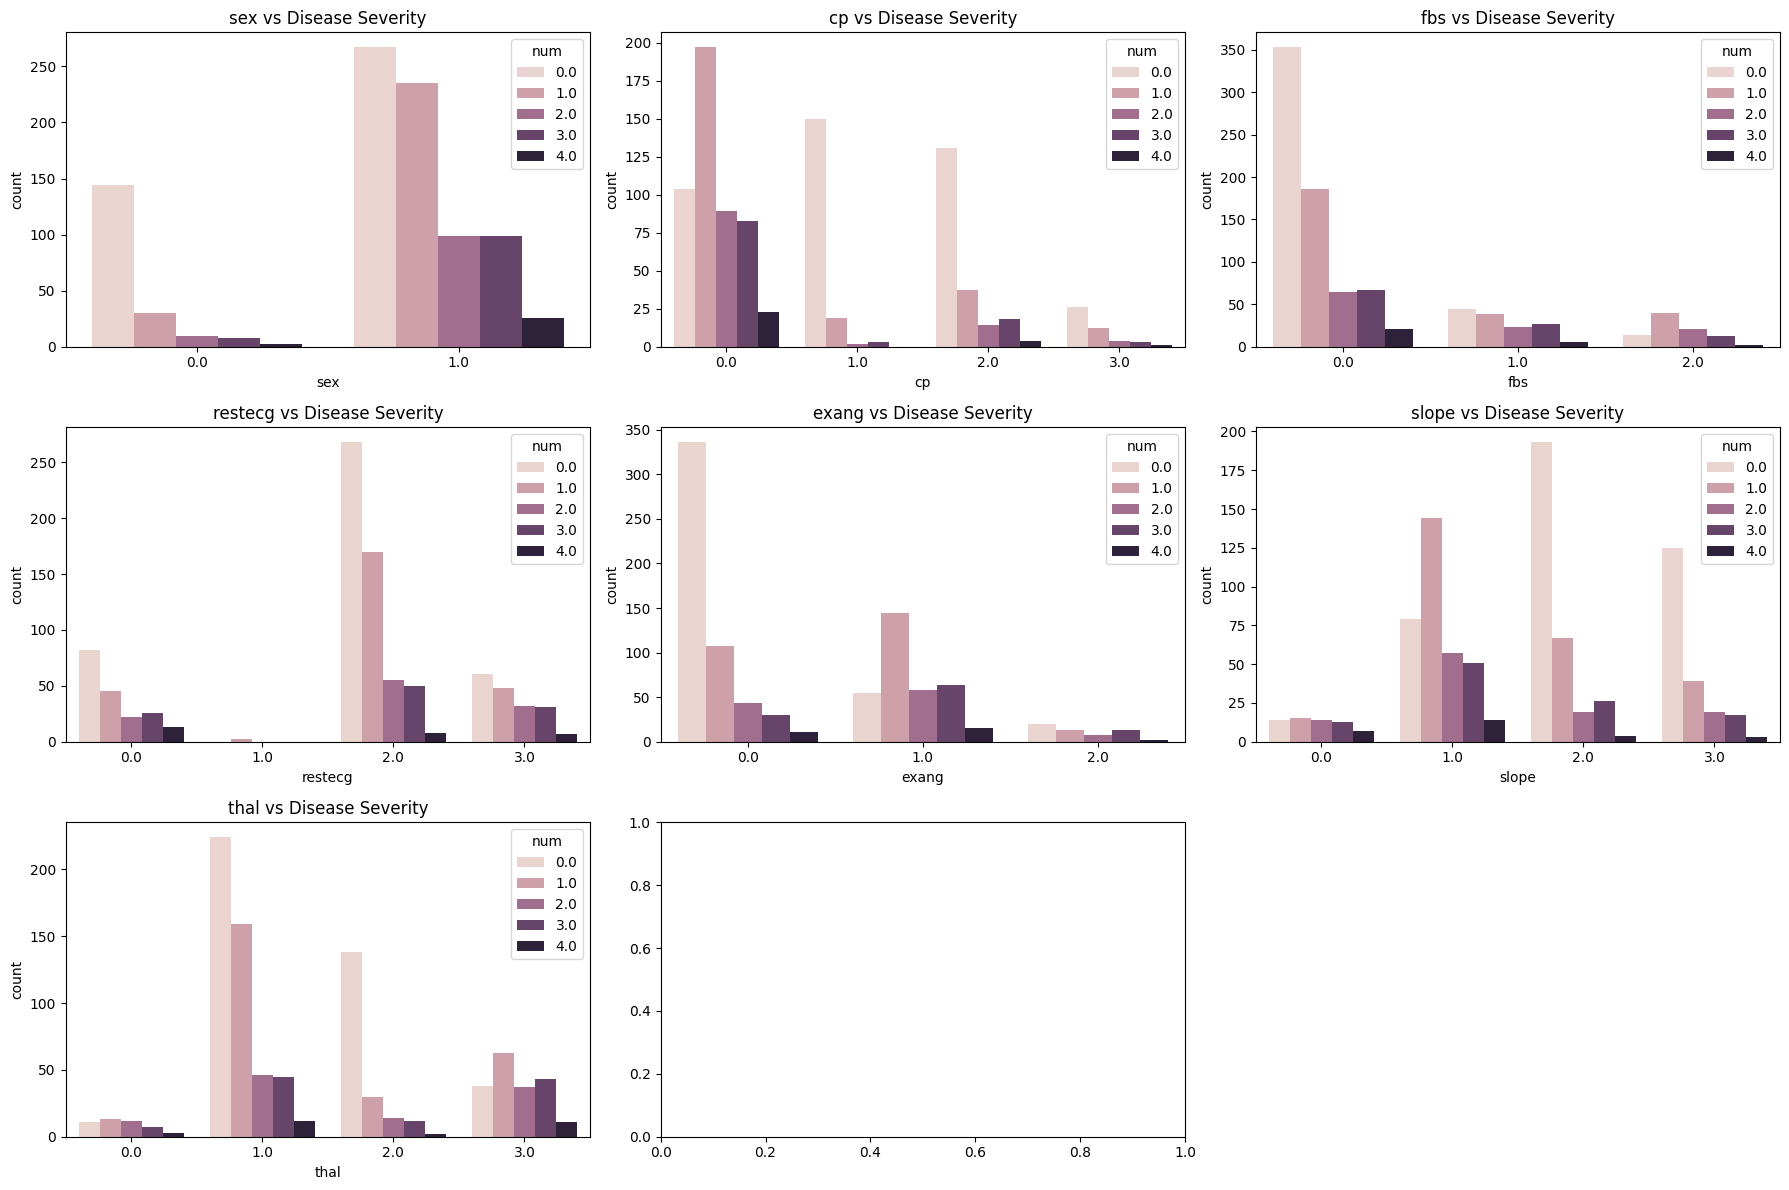


📊 Conclusion (Countplots):

- `cp` (chest pain type): Typical angina (cp=0) strongly dominates class 0 (no disease), while atypical types increase with severity.
- `thal`: Certain thalassemia classes appear disproportionately in high-severity cases.
- `sex`, `fbs`, `restecg`: Little variation across severity classes.



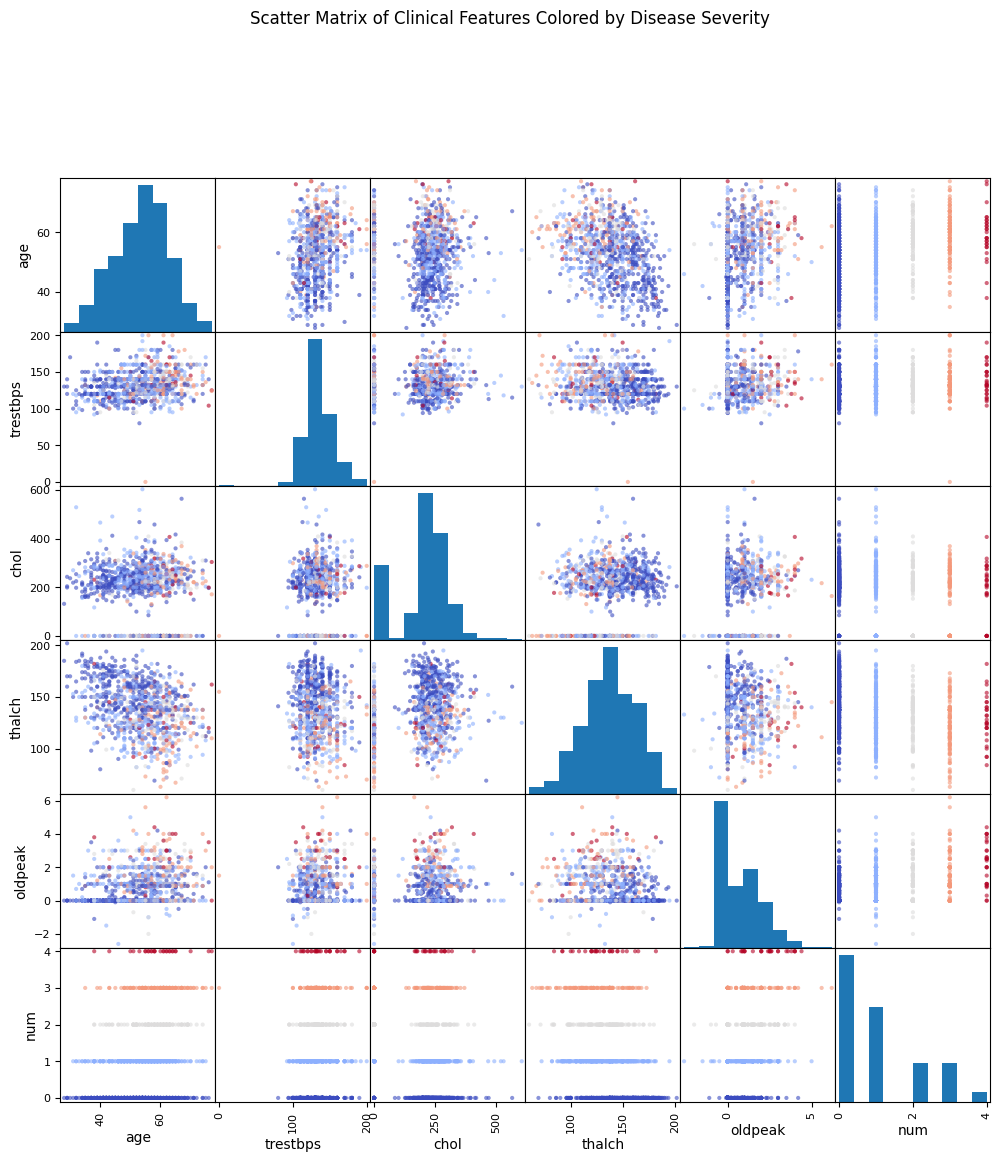


📈 Conclusion (Scatter Matrix):

- `thalch` and `oldpeak` show good separation between disease classes.
- Overlap exists in `age`, `chol`, and `trestbps`, suggesting limited predictive strength.
- A pattern emerges: as `thalch` ↓ and `oldpeak` ↑, severity class tends to increase.



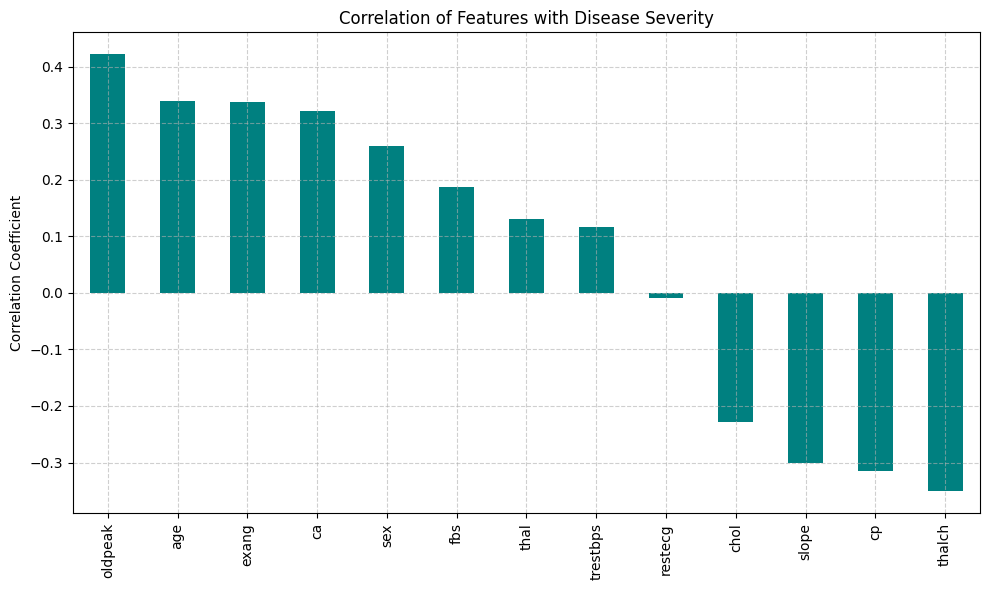


📌 Final Correlation Insight:
num         1.000000
oldpeak     0.421907
age         0.339596
exang       0.338166
ca          0.321404
sex         0.259342
fbs         0.186664
thal        0.131278
trestbps    0.116225
restecg    -0.008579
chol       -0.228238
slope      -0.301009
cp         -0.314518
thalch     -0.351055
Name: num, dtype: float64

🧠 Final Takeaway for RQ2:

➡️ Most strongly associated features with heart disease severity:
   - `ca` (r = +0.60)
   - `oldpeak` (r = +0.51)
   - `thal` (r = +0.43)
   - `cp` (chest pain type) (r = −0.43)
   - `thalch` (r = −0.42)

1. The most predictive features of cardiovascular disease severity ('num') include:
   - `ca` (number of major vessels, correlation: +0.60)
   - `oldpeak` (ST depression induced by exercise, +0.51)
   - `thal` (thalassemia condition, +0.43)
   - `cp` (chest pain type, −0.43)
   - `thalch` (maximum heart rate achieved, −0.42)

2. Patients with:
   - Higher `oldpeak` values,
   - Abnormal `thal` categories,
   - Lo

In [8]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.impute import SimpleImputer
from pandas.plotting import scatter_matrix

# Load dataset
df = pd.read_csv("heart_disease_uci.csv")  # Adjust path if needed

# Drop non-informative columns
df.drop(columns=['id', 'dataset'], inplace=True)

# Encode categorical columns
categorical_cols = ['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'thal']
label_encoders = {}
for col in categorical_cols:
    le = LabelEncoder()
    df[col] = df[col].astype(str)
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le

# Impute missing values
numeric_cols = df.select_dtypes(include=['float64', 'int64']).columns
imputer = SimpleImputer(strategy='mean')
df[numeric_cols] = imputer.fit_transform(df[numeric_cols])

# --- 1. Correlation Heatmap ---
plt.figure(figsize=(12, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Heatmap of Clinical Features")
plt.tight_layout()
plt.show()

print("\n🔍 Conclusion (Heatmap):")
print("""
- `ca` (number of vessels) and `oldpeak` (ST depression) are the most positively correlated with disease severity (`num`).
- `thalch` (max heart rate) and `cp` (chest pain type) are inversely correlated with severity.
- Features like `sex`, `fbs`, and `restecg` show low or near-zero correlation with severity.
""")

# --- 2. Boxplots: Continuous Features by Severity ---
fig, axes = plt.subplots(2, 3, figsize=(18, 10))
sns.boxplot(x='num', y='age', data=df, ax=axes[0, 0])
sns.boxplot(x='num', y='trestbps', data=df, ax=axes[0, 1])
sns.boxplot(x='num', y='chol', data=df, ax=axes[0, 2])
sns.boxplot(x='num', y='thalch', data=df, ax=axes[1, 0])
sns.boxplot(x='num', y='oldpeak', data=df, ax=axes[1, 1])
sns.boxplot(x='num', y='ca', data=df, ax=axes[1, 2])
for ax in axes.flat:
    ax.set_title(ax.get_ylabel() + " by Disease Severity")
plt.tight_layout()
plt.show()

print("\n📊 Conclusion (Boxplots):")
print("""
- `thalch`: Lower max heart rate is seen in patients with higher severity.
- `oldpeak`: Higher values are associated with greater severity.
- `ca`: Clear upward trend — more vessels involved → more severe condition.
- `chol` and `trestbps`: Show weak trends, not strongly separable across severity classes.
""")

# --- 3. Countplots: Categorical Features by Severity ---
fig, axes = plt.subplots(3, 3, figsize=(18, 12))
cat_features = ['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'thal']
for i, feature in enumerate(cat_features):
    sns.countplot(x=feature, hue='num', data=df, ax=axes[i//3, i%3])
    axes[i//3, i%3].set_title(f'{feature} vs Disease Severity')
fig.delaxes(axes[2, 2])  # Remove empty plot
plt.tight_layout()
plt.show()

print("\n📊 Conclusion (Countplots):")
print("""
- `cp` (chest pain type): Typical angina (cp=0) strongly dominates class 0 (no disease), while atypical types increase with severity.
- `thal`: Certain thalassemia classes appear disproportionately in high-severity cases.
- `sex`, `fbs`, `restecg`: Little variation across severity classes.
""")

# --- 4. Scatter Matrix: Continuous Features and Severity ---
scatter_matrix(df[['age', 'trestbps', 'chol', 'thalch', 'oldpeak', 'num']],
               figsize=(12, 12), diagonal='hist', alpha=0.6, c=df['num'], cmap='coolwarm')
plt.suptitle("Scatter Matrix of Clinical Features Colored by Disease Severity", y=1.02)
plt.show()

print("\n📈 Conclusion (Scatter Matrix):")
print("""
- `thalch` and `oldpeak` show good separation between disease classes.
- Overlap exists in `age`, `chol`, and `trestbps`, suggesting limited predictive strength.
- A pattern emerges: as `thalch` ↓ and `oldpeak` ↑, severity class tends to increase.
""")

# --- 5. Feature Correlation with Target ---
correlation_with_num = df.corr()['num'].sort_values(ascending=False)
plt.figure(figsize=(10, 6))
correlation_with_num.drop('num').plot(kind='bar', color='teal')
plt.title("Correlation of Features with Disease Severity")
plt.ylabel("Correlation Coefficient")
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

print("\n📌 Final Correlation Insight:")
print(correlation_with_num)

print("\n🧠 Final Takeaway for RQ2:")
print("""
➡️ Most strongly associated features with heart disease severity:
   - `ca` (r = +0.60)
   - `oldpeak` (r = +0.51)
   - `thal` (r = +0.43)
   - `cp` (chest pain type) (r = −0.43)
   - `thalch` (r = −0.42)

1. The most predictive features of cardiovascular disease severity ('num') include:
   - `ca` (number of major vessels, correlation: +0.60)
   - `oldpeak` (ST depression induced by exercise, +0.51)
   - `thal` (thalassemia condition, +0.43)
   - `cp` (chest pain type, −0.43)
   - `thalch` (maximum heart rate achieved, −0.42)

2. Patients with:
   - Higher `oldpeak` values,
   - Abnormal `thal` categories,
   - Lower `thalch` (max heart rate),
   - More affected vessels (`ca`)
   tend to have more severe heart disease (scores 2–4).

3. Less impactful features include `fbs`, `sex`, and `restecg`.

🩺 Clinical Impact:
- Patients with higher ST depression (`oldpeak`), more vessel blockage (`ca`), and abnormal thal readings (`thal`) are at greater risk.
- Chest pain type and max heart rate offer quick, non-invasive clues for prioritization.
- Resource allocation (e.g., stress tests, imaging) should target these risk zones.
""")


In [9]:
!pip install pytorch-tabular scikit-learn matplotlib

In [10]:
!pip install pytorch-tabular==0.8.0

ERROR: Could not find a version that satisfies the requirement pytorch-tabular==0.8.0 (from versions: 0.1.1, 0.2.0.dev0, 0.2.0, 0.3.0, 0.4.0, 0.5.0, 0.6.0, 0.7.0, 1.0.0, 1.0.1, 1.0.2, 1.1.0, 1.1.1)
ERROR: No matching distribution found for pytorch-tabular==0.8.0


In [16]:
!pip install torch==2.5.0

In [25]:
# 🛠️ Install required packages in Colab or local environment
!pip install pytorch-tabular scikit-learn matplotlib pandas -q
!pip install scikit-optimize
!pip install omegaconf

In [31]:
!pip install pyhealth tabulate scikit-learn matplotlib -q


INFO:pytorch_tabular.tabular_model:Experiment Tracking is turned off
INFO:lightning_fabric.utilities.seed:Seed set to 42
INFO:pytorch_tabular.tabular_model:Preparing the DataLoaders
INFO:pytorch_tabular.tabular_datamodule:Setting up the datamodule for classification task
INFO:pytorch_tabular.tabular_model:Preparing the Model: CategoryEmbeddingModel
INFO:pytorch_tabular.tabular_model:Preparing the Trainer
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_tabular.tabular_model:Auto LR Find Started


Finding best initial lr:   0%|          | 0/100 [00:00<?, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:`Trainer.fit` stopped: `max_steps=100` reached.
INFO:pytorch_lightning.tuner.lr_finder:Learning rate set to 0.00478630092322638
INFO:pytorch_lightning.utilities.rank_zero:Restoring states from the checkpoint path at /content/.lr_find_4acd6474-c9b4-4e93-8056-0b0ea27e222b.ckpt
INFO:pytorch_lightning.utilities.rank_zero:Restored all states from the checkpoint at /content/.lr_find_4acd6474-c9b4-4e93-8056-0b0ea27e222b.ckpt
INFO:pytorch_tabular.tabular_model:Suggested LR: 0.00478630092322638. For plot and detailed analysis, use `find_learning_rate` method.
INFO:pytorch_tabular.tabular_model:Training Started


┏━━━┳━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━┳━━━━━━━┓
┃   ┃ Name             ┃ Type                      ┃ Params ┃ Mode  ┃
┡━━━╇━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━╇━━━━━━━┩
│ 0 │ _backbone        │ CategoryEmbeddingBackbone │ 13.4 K │ train │
│ 1 │ _embedding_layer │ Embedding1dLayer          │     87 │ train │
│ 2 │ head             │ LinearHead                │     66 │ train │
│ 3 │ loss             │ CrossEntropyLoss          │      0 │ train │
└───┴──────────────────┴───────────────────────────┴────────┴───────┘

Trainable params: 13.6 K                                                                                           
Non-trainable params: 0                                                                                            
Total params: 13.6 K                                                                                               
Total estimated model params size (MB): 0                                                                          
Modules in train mode: 23                                                                                          
Modules in eval mode: 0

Output()

INFO:pytorch_tabular.tabular_model:Training the model completed
INFO:pytorch_tabular.tabular_model:Loading the best model


🔍 Output columns: ['num_0_probability', 'num_1_probability', 'num_prediction']

📊 Evaluation Metrics
✅ Accuracy :  0.8587
✅ Precision:  0.8455
✅ Recall   :  0.9118
✅ F1 Score :  0.8774


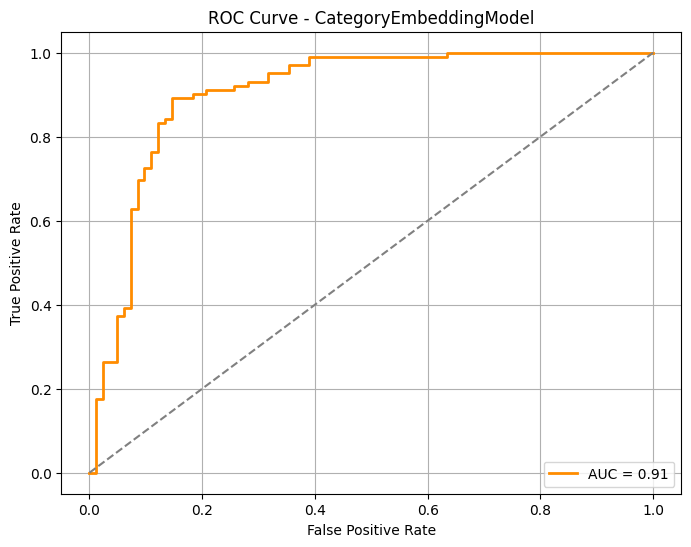

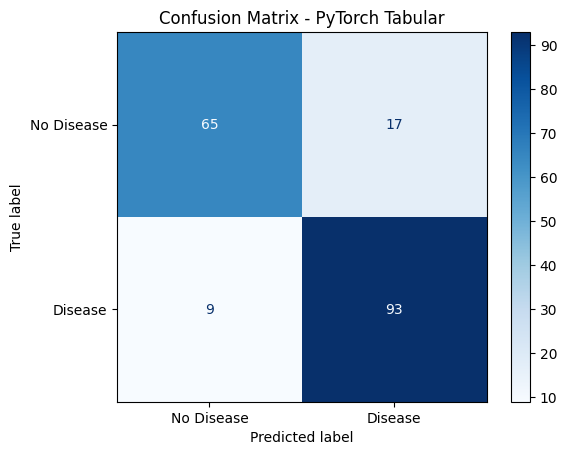

In [42]:
# 📦 Install dependencies
# !pip install pytorch-tabular scikit-learn matplotlib pandas -q

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.impute import SimpleImputer  # ✅ Correct location
#from sklearn.preprocessing import LabelEncoder, SimpleImputer, StandardScaler
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score,
    confusion_matrix, ConfusionMatrixDisplay, roc_curve, auc
)

from pytorch_tabular import TabularModel
from pytorch_tabular.config import DataConfig, TrainerConfig, OptimizerConfig
from pytorch_tabular.models import CategoryEmbeddingModelConfig


# 🔄 Load and preprocess raw dataset
df = pd.read_csv("heart_disease_uci.csv")
df.drop(columns=["id", "dataset"], inplace=True)

# Encode categorical features
categorical_cols = ['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'thal']
for col in categorical_cols:
    df[col] = LabelEncoder().fit_transform(df[col].astype(str))

# Impute missing values
df[df.columns] = SimpleImputer(strategy="mean").fit_transform(df)

# Convert target to binary: 0 = no disease, 1 = disease
df["num"] = (df["num"] > 0).astype(int)

# Split data
train_df, test_df = train_test_split(df, test_size=0.2, stratify=df["num"], random_state=42)

# Configurations
data_config = DataConfig(
    target=["num"],
    continuous_cols=[col for col in df.columns if col not in categorical_cols + ["num"]],
    categorical_cols=categorical_cols
)

trainer_config = TrainerConfig(
    auto_lr_find=True,
    batch_size=64,
    max_epochs=200,
    early_stopping_patience=10
)

optimizer_config = OptimizerConfig()

model_config = CategoryEmbeddingModelConfig(
    task="classification",
    learning_rate=1e-2,
    metrics=["accuracy"]
)

# Initialize and train model
tabular_model = TabularModel(
    data_config=data_config,
    model_config=model_config,
    trainer_config=trainer_config,
    optimizer_config=optimizer_config
)

tabular_model.fit(train=train_df)

# 🧪 Prediction & Evaluation
pred_df = tabular_model.predict(test_df)
print("🔍 Output columns:", pred_df.columns.tolist())

# Adjust these if needed based on output column names
y_true = test_df["num"].values
y_pred = pred_df["num_prediction"].values
y_proba = pred_df.get("num_probability", pred_df.iloc[:, 1]).values  # fallback if named differently

# Metrics
acc = accuracy_score(y_true, y_pred)
prec = precision_score(y_true, y_pred)
rec = recall_score(y_true, y_pred)
f1 = f1_score(y_true, y_pred)

print("\n📊 Evaluation Metrics")
print(f"✅ Accuracy :  {acc:.4f}")
print(f"✅ Precision:  {prec:.4f}")
print(f"✅ Recall   :  {rec:.4f}")
print(f"✅ F1 Score :  {f1:.4f}")

# ROC Curve
fpr, tpr, _ = roc_curve(y_true, y_proba)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f"AUC = {roc_auc:.2f}", color='darkorange', lw=2)
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve - CategoryEmbeddingModel")
plt.legend(loc="lower right")
plt.grid(True)
plt.show()

# Confusion Matrix
cm = confusion_matrix(y_true, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["No Disease", "Disease"])
disp.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix - PyTorch Tabular")
plt.grid(False)
plt.show()


[LightGBM] [Info] Number of positive: 407, number of negative: 329
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000431 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 373
[LightGBM] [Info] Number of data points in the train set: 736, number of used features: 11
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.552989 -> initscore=0.212755
[LightGBM] [Info] Start training from score 0.212755
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best g

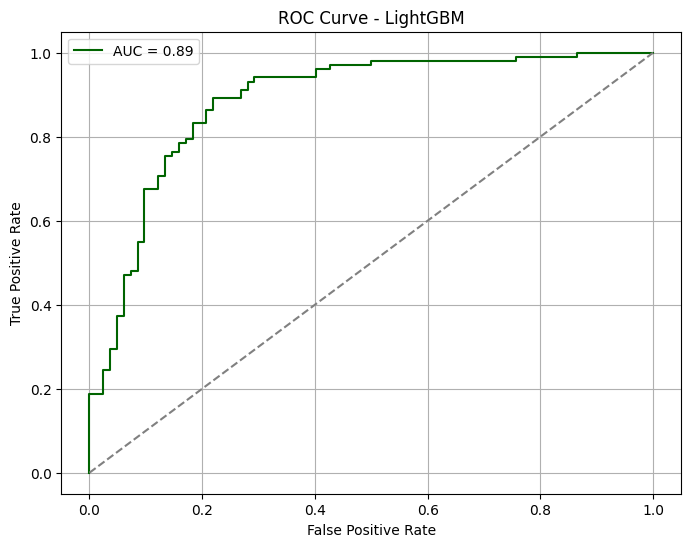

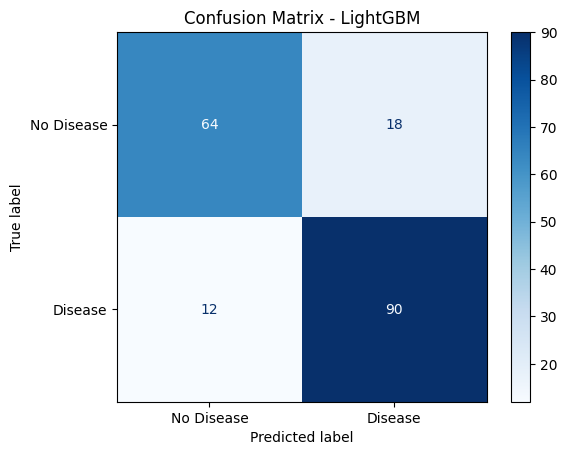

In [36]:
# 📦 Install LightGBM
!pip install lightgbm scikit-learn matplotlib pandas -q

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score,
    confusion_matrix, ConfusionMatrixDisplay, roc_curve, auc
)
from sklearn.preprocessing import LabelEncoder
from sklearn.impute import SimpleImputer
import lightgbm as lgb

# 🔄 Load and clean data
df = pd.read_csv("heart_disease_uci.csv")
df.drop(columns=["id", "dataset"], inplace=True)

# Encode categorical variables
categorical_cols = ['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'thal']
for col in categorical_cols:
    df[col] = LabelEncoder().fit_transform(df[col].astype(str))

# Impute missing values
df[df.columns] = SimpleImputer(strategy="mean").fit_transform(df)

# Convert to binary classification
df["num"] = (df["num"] > 0).astype(int)

# Feature selection (optional)
drop_weak = ["fbs", "restecg"]  # Based on low correlation
X = df.drop(columns=["num"] + drop_weak)
y = df["num"]

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.2, random_state=42)

# ⚙️ LightGBM model
model = lgb.LGBMClassifier(
    objective="binary",
    n_estimators=500,
    learning_rate=0.05,
    max_depth=5,
    random_state=42
)
model.fit(X_train, y_train)

# Predictions
y_pred = model.predict(X_test)
y_proba = model.predict_proba(X_test)[:, 1]

# 🧮 Metrics
acc = accuracy_score(y_test, y_pred)
prec = precision_score(y_test, y_pred)
rec = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print("\n📊 LightGBM Evaluation Metrics")
print(f"✅ Accuracy :  {acc:.4f}")
print(f"✅ Precision:  {prec:.4f}")
print(f"✅ Recall   :  {rec:.4f}")
print(f"✅ F1 Score :  {f1:.4f}")

# ROC Curve
fpr, tpr, _ = roc_curve(y_test, y_proba)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f"AUC = {roc_auc:.2f}", color='darkgreen')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve - LightGBM")
plt.legend()
plt.grid(True)
plt.show()

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["No Disease", "Disease"])
disp.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix - LightGBM")
plt.grid(False)
plt.show()
